In [12]:
import mne

In [9]:
theta = [i for i in range(3, 9)]
alpha = [i for i in range(8, 16)]
beta = [i for i in range(15, 31)]
gamma = [i for i in range(30, 61)]
freq_bands = [theta, alpha, beta, gamma]

In [ ]:
for subject in subjects:
    time_series_dir = 
    for freq_band in freq_bands:
        ...

    mris_dir = 
    src = 
    bem =
    fwd = 
    data_cov = 
    noise_cov = 
    lcmv_filter = 
    stc = 

__Noise covariance matrix__

In [ ]:
file = 'D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\sub2\\raw\\Encoding1_tsss_mc_trans_annotated_filtered_reconstructed.fif'
raw = mne.io.read_raw_fif(file)

empty_room_file =  mne.io.read_raw_fif('D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\empty_room.fif', preload=True)
empty_room_file = empty_room_file.resample(200)

In [22]:
empty_room_filt = empty_room_file.copy()\
    .filter(l_freq=.5, h_freq=90)\
    .notch_filter(50) # filter data

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 6601 samples (6.601 sec)



[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 306 out of 306 | elapsed:    1.9s finished


In [19]:
raw.info

<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 2 EOG, 1 ECG, 13 misc, 4 Stimulus, 9 CHPI
 custom_ref_applied: False
 description: Vectorview system
 dev_head_t: MEG device -> head transform
 dig: 203 items (3 Cardinal, 4 HPI, 196 Extra)
 events: 1 item (list)
 experimenter: meg
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 90.0 Hz
 meas_date: 2021-04-21 13:01:38 UTC
 meas_id: 4 items (dict)
 nchan: 335
 proc_history: 2 items (list)
 proj_id: 1 item (ndarray)
 proj_name: memory_formation
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

In [23]:
empty_room_filt.info

<Info | 18 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 2 EOG, 1 ECG, 13 misc, 4 Stimulus
 custom_ref_applied: False
 description: Vectorview system
 experimenter: meg
 file_id: 4 items (dict)
 highpass: 0.5 Hz
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 90.0 Hz
 meas_date: 2021-04-07 06:29:37 UTC
 meas_id: 4 items (dict)
 nchan: 326
 proj_id: 1 item (ndarray)
 proj_name: meditation
 projs: generated with autossp-1.0.1: off, generated with autossp-1.0.1: ...
 sfreq: 1000.0 Hz
 subject_info: 6 items (dict)
>

In [24]:
noise_cov = mne.compute_raw_covariance(
    empty_room_filt, tmin=0, tmax=None)

Using up to 1425 segments
Number of samples used : 285000
[done]


Computing rank from covariance with rank=None
    Using tolerance 1.3e-10 (2.2e-16 eps * 102 dim * 5.7e+03  max singular value)
    Estimated rank (mag): 102
    MAG: rank 102 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 6.9e-12 (2.2e-16 eps * 204 dim * 1.5e+02  max singular value)
    Estimated rank (grad): 204
    GRAD: rank 204 computed from 204 data channels with 0 projectors


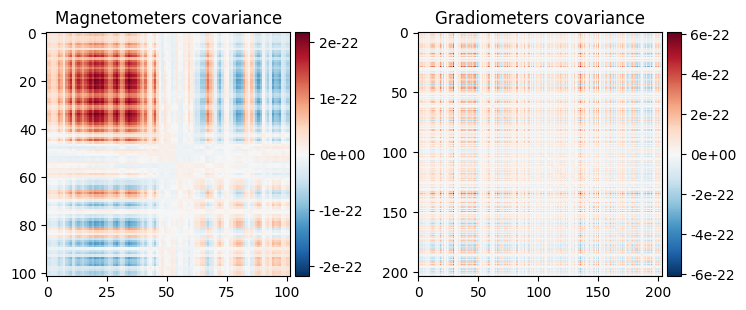

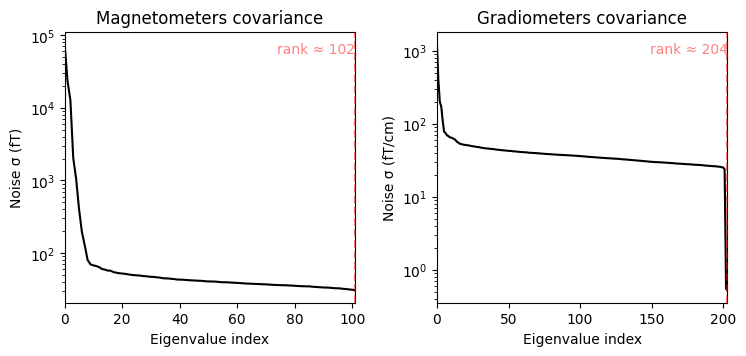

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [26]:
noise_cov.plot(empty_room_filt.info)

In [ ]:
empty_room_file_2 =  mne.io.read_raw_fif('D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\empty_room_2.fif', preload=True)
empty_room_file_2 = empty_room_file_2.resample(200)

empty_room_filt_2 = empty_room_file_2.copy()\
    .filter(l_freq=.5, h_freq=90)\
    .notch_filter(50) # filter data

noise_cov_2 = mne.compute_raw_covariance(
    empty_room_filt_2, tmin=0, tmax=None)

Computing rank from covariance with rank=None
    Using tolerance 3.5e-11 (2.2e-16 eps * 102 dim * 1.5e+03  max singular value)
    Estimated rank (mag): 102
    MAG: rank 102 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 1.9e-12 (2.2e-16 eps * 204 dim * 41  max singular value)
    Estimated rank (grad): 204
    GRAD: rank 204 computed from 204 data channels with 0 projectors


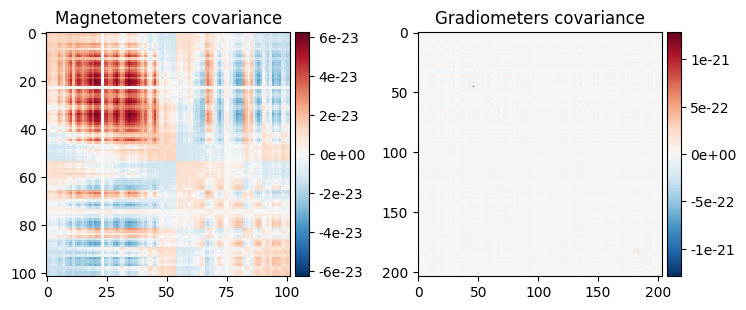

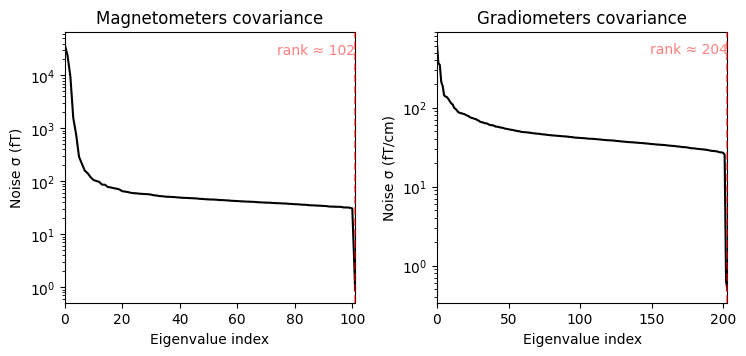

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [33]:
noise_cov_2.plot(empty_room_filt_2.info)

In [ ]:
empty_room_file_3 =  mne.io.read_raw_fif('D:\\Ekaterina_Voevodina\\memory_formation\\data\\subjects\\empty_room_3.fif', preload=True)
empty_room_file_3 = empty_room_file_3.resample(200)

empty_room_filt_3 = empty_room_file_3.copy()\
    .filter(l_freq=.5, h_freq=90)\
    .notch_filter(50) # filter data

noise_cov_3 = mne.compute_raw_covariance(
    empty_room_filt_3, tmin=0, tmax=None)

Computing rank from covariance with rank=None
    Using tolerance 1.1e-10 (2.2e-16 eps * 102 dim * 4.8e+03  max singular value)
    Estimated rank (mag): 102
    MAG: rank 102 computed from 102 data channels with 0 projectors
Computing rank from covariance with rank=None
    Using tolerance 5.9e-12 (2.2e-16 eps * 204 dim * 1.3e+02  max singular value)
    Estimated rank (grad): 204
    GRAD: rank 204 computed from 204 data channels with 0 projectors


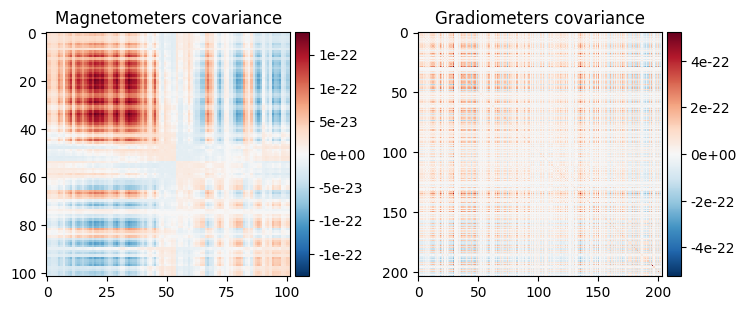

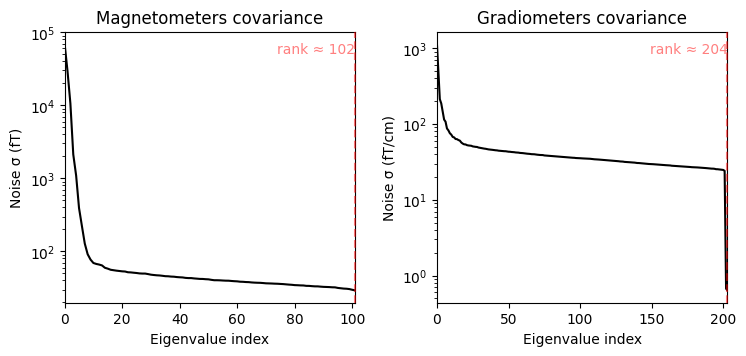

(<Figure size 760x370 with 4 Axes>, <Figure size 760x370 with 2 Axes>)

In [35]:
noise_cov_3.plot(empty_room_filt_3.info)